Before Starting, the Analytics Base table suggest few important details regarding the dataset:
1. Value of slag range from 0-305, only 10 values are above 300, which means these could be outliers
2. In ash column, 70% values lie between 0 & 100, there are 2 values above 200, this indicate presence of outliers and skewness
3. Data does not have any missing values but definetely needs to prepared for analysis

In [2]:
#Importing key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading datafile
concrete_df = pd.read_csv('D:\Sumant Data\MySQL\AIML\Feature selection\Project\concrete.csv')

In [4]:
concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
concrete_df.info()
#All the attributes are non-empty & numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
#Looking at univariate analysis 
concrete_df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

1. Cement: 1st quartile-minimum is almost half the difference between max & 3 quartile, outlier is suspected
        Analysis of IQR suggest outlier is mostly on the higher end
2. Slag:   Huge difference between (q1-min) & (max-q3), it means either outlier or presence 2 separate Gaussian
        Mean is almost thrice of median which again proves the claim of outliers and likelihood of more than 1 Gaussian
3. Ash:    Median is 0 while mean is 54.18, this suggest positive skewnewss in the data
        Data upto 2nd quartile is all 0 while Q3 and max are above 100, suggest some inconsistency
4. Water:  Data seems to be more or less symetric, low SD suggest tight distribution of data
5. Superplastic: Analysis of IQR (10) indicates presence of probable outilers on both end of distribution
6. Fineagg: Data is more or less symmetric, however there might be some outliers in the lower end
7. Coarseagg: Data is more or less symmetric, however there might be some outliers in the higher end
8. Age: IQR (49), max value is much higher than IQR suggesting presence of outliers or more than one cluster

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


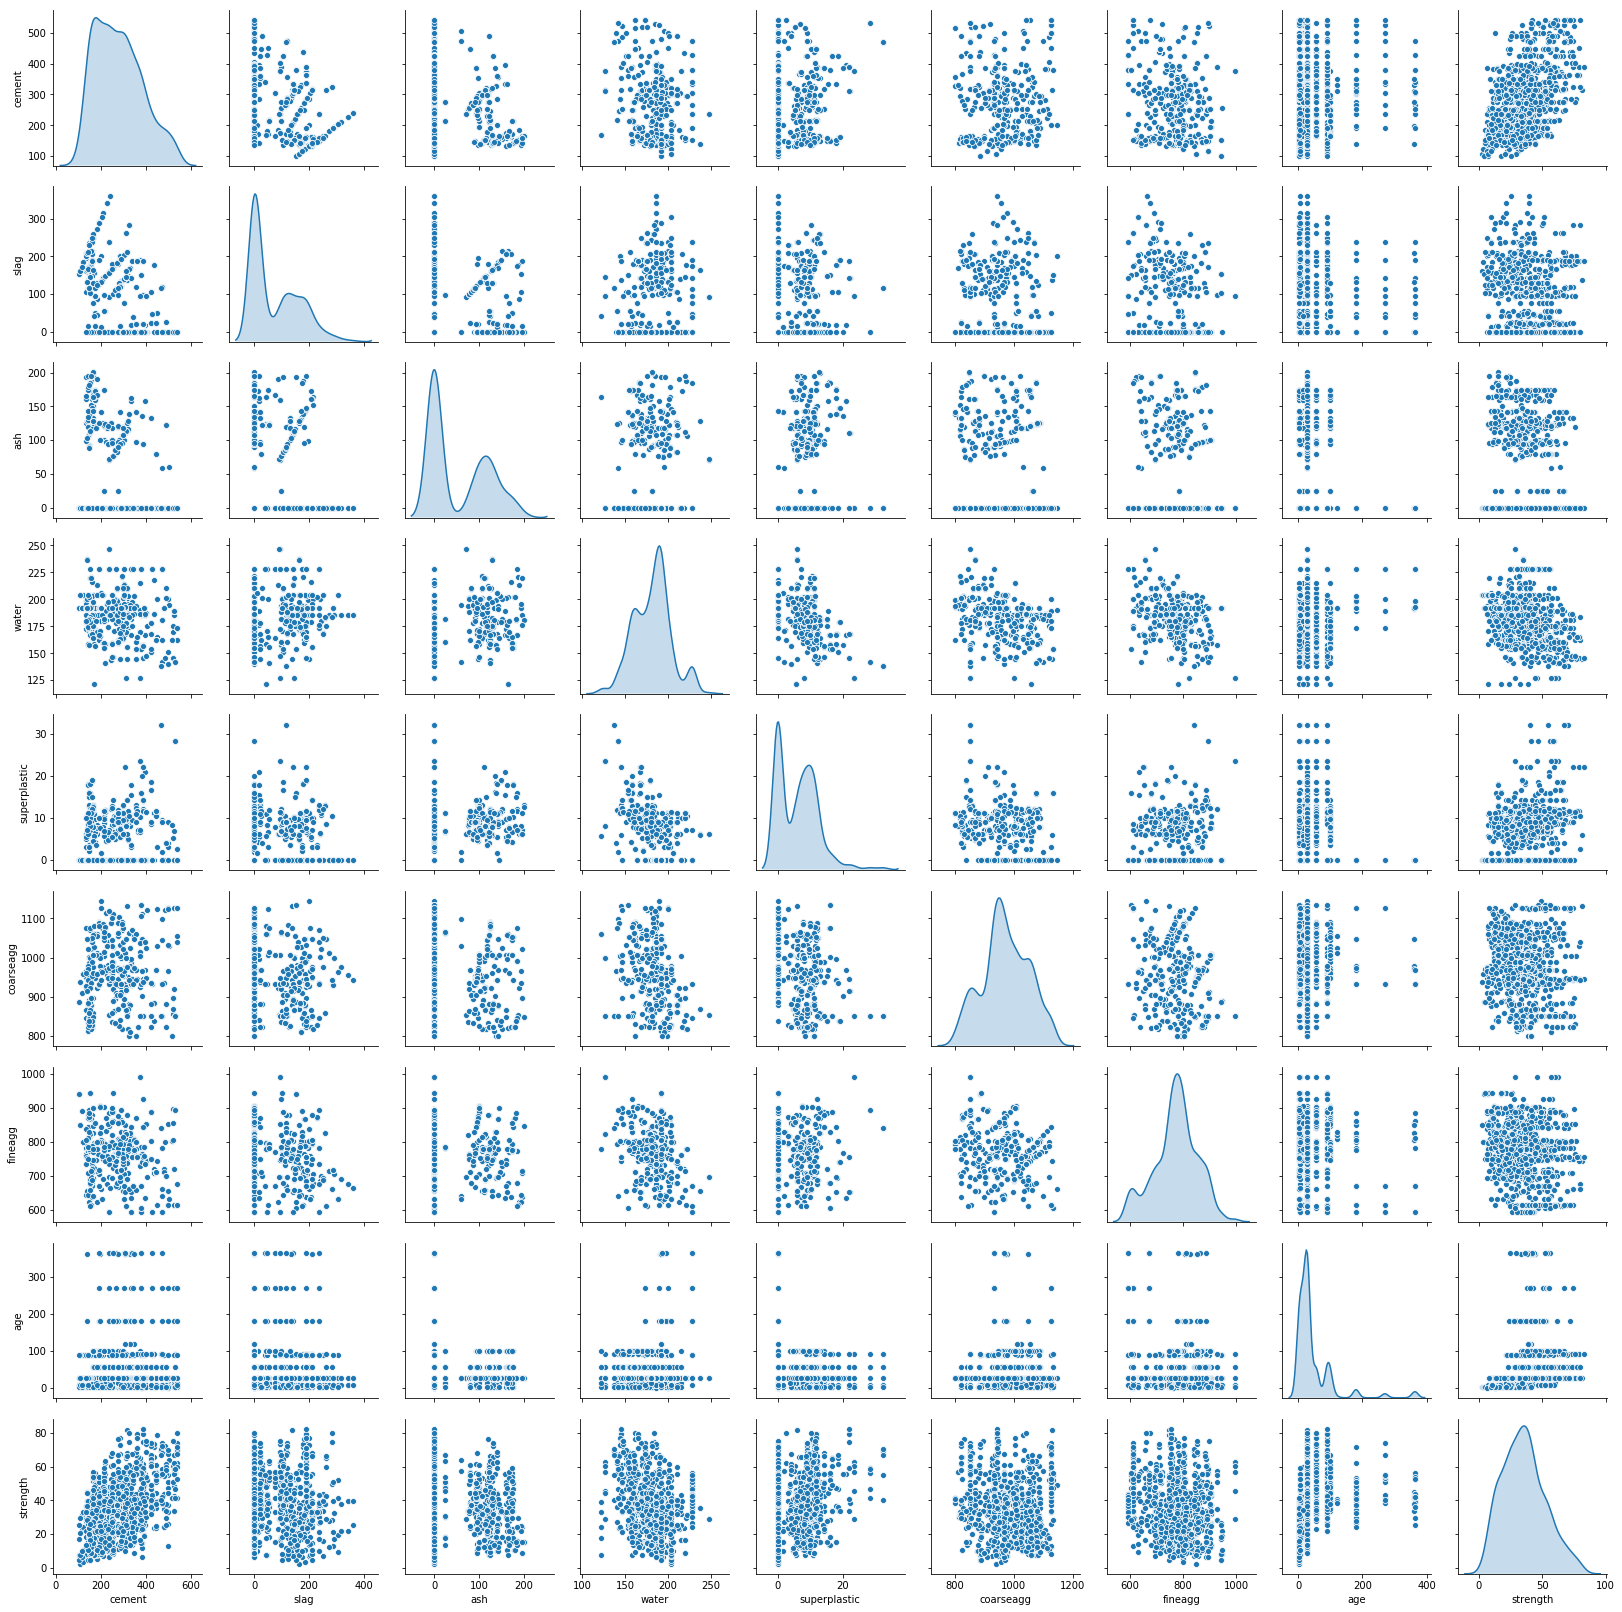

In [7]:
#Plotting pairplot to check the how attributes interact with each other
#Pairplot clearly indicate the presence of clusters between 3-9 

sns.pairplot(concrete_df,diag_kind='kde')

In [8]:
#Separating the independ attributes in the datasets
X = concrete_df.loc[:,'cement':'age']

In [9]:
y = concrete_df.loc[:,'strength']

In [10]:
#creating the model with raw data to benchmark the model strength
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from scipy.stats import zscore
import scipy.stats as stats

In [11]:
x_z = X.apply(zscore)

In [12]:
#splitting the data into training and test set
x_train,x_test,y_train,y_test = train_test_split(x_z,y,test_size = 0.3,random_state = 1)

In [13]:
clt = svm.SVR()

In [14]:
clt.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = clt.predict(x_test)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


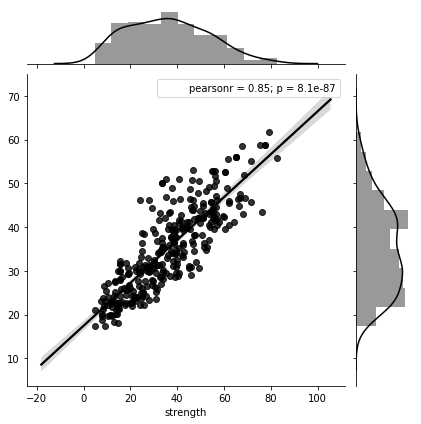

In [16]:
#checking the model trength
j=sns.jointplot(x = y_test,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)


In [17]:
#Using Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
x_array = x_z.values
y_array = y.values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_array,y_array,test_size = 0.3,random_state = 1)

In [19]:
reg = DecisionTreeRegressor(random_state=0,max_depth=5)

In [20]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [21]:
y_pred = reg.predict(x_test)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


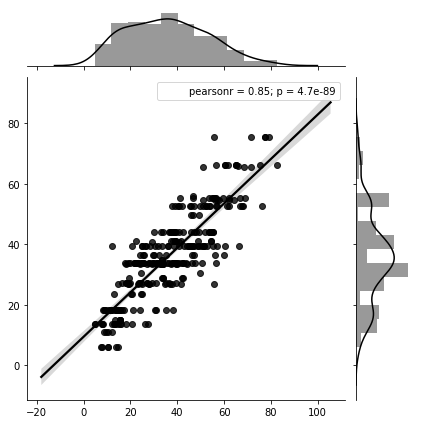

In [22]:
#checking the model trength
j=sns.jointplot(x = y_test,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)


With raw data, we got a model strength of 85%, now in iteration 2, we build model by cleaning data and feature enineering

In [23]:
##################### ITERATION 2 ##############################

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


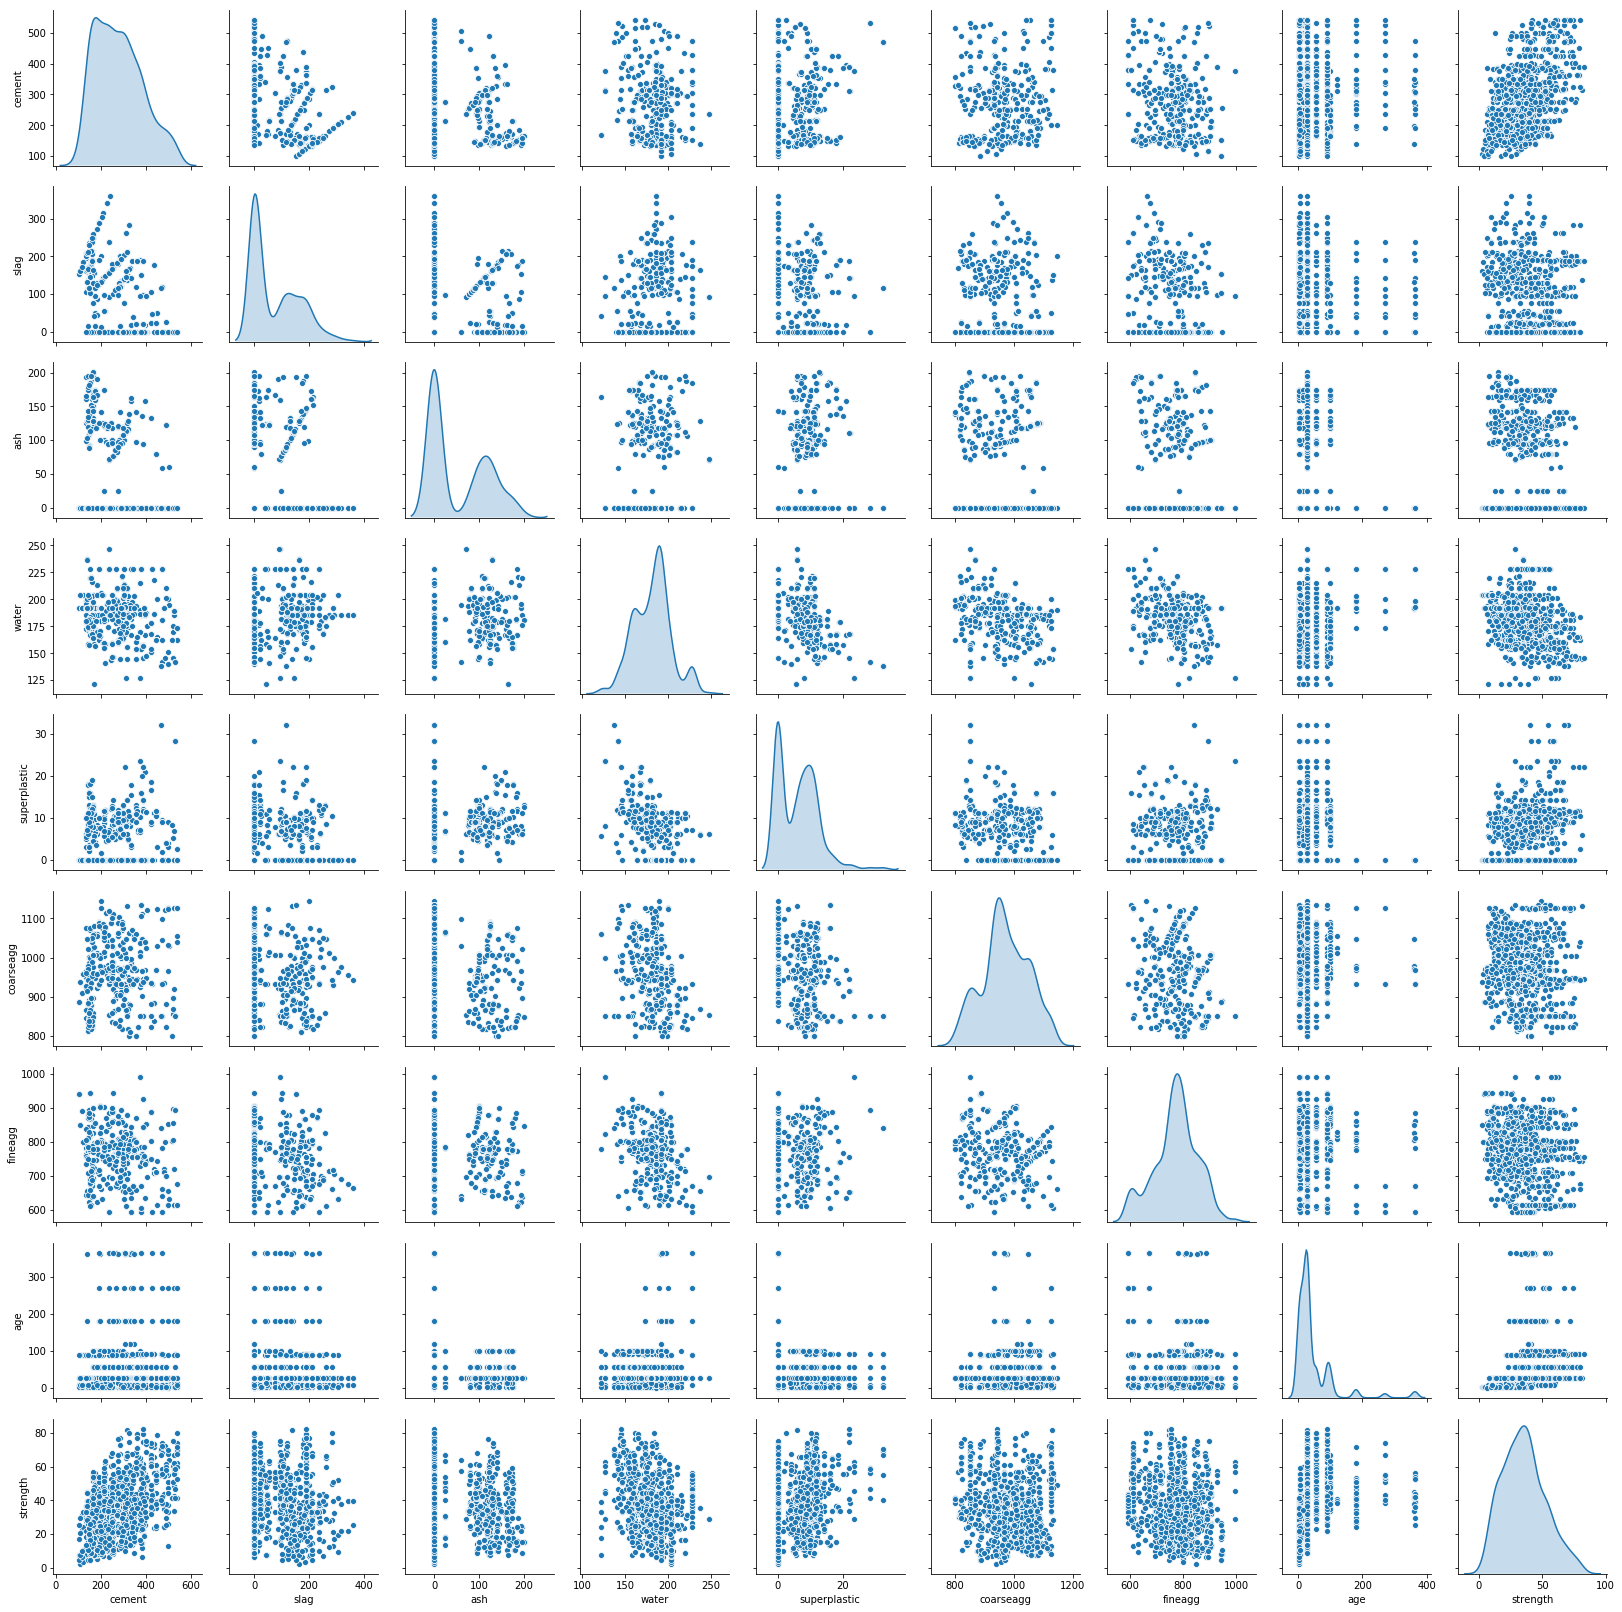

In [24]:
#Using KMeans clustering to break data into different clusters and treating each clusters separately
#Again plotting a pair plot to get a hint of hidden clusters
sns.pairplot(concrete_df,diag_kind='kde')

In [25]:
X.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28

In [26]:
from sklearn.cluster import KMeans

Text(0.5,1,'Selecting k with Elbow Method')

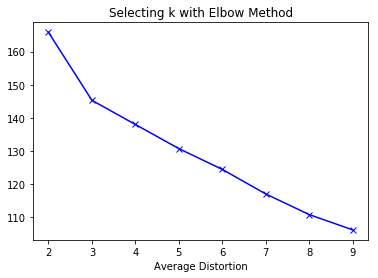

In [27]:
from scipy.spatial.distance import cdist
clusters = range(2,10) #Taking the range of possible clusters
meandistort = []
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(concrete_df) #Applying KMean clustering on dataset
    prediction = model.predict(concrete_df)
    meandistort.append(sum(np.min(cdist(concrete_df,model.cluster_centers_,'euclidean'),axis=1))/concrete_df.shape[0])
    
plt.plot(clusters,meandistort,'-bx')
plt.xlabel('Average Distortion')
plt.title('Selecting k with Elbow Method')

In [28]:
#Elbow plot suggest the value of K to be betweek 3 & 5, so trying with k=3
final_model = KMeans(3)
final_model.fit(concrete_df)
pred = final_model.predict(concrete_df)
concrete_df['Groups'] = pred   #Appending the clusters in the dataset

In [29]:
concrete_df.groupby('Groups').count()

cement  slag  ash  water  superplastic  coarseagg  fineagg  age  \
Groups                                                                    
0          350   350  350    350           350        350      350  350   
1          335   335  335    335           335        335      335  335   
2          345   345  345    345           345        345      345  345   

        strength  
Groups            
0            350  
1            335  
2            345

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AE1A400F0>,
      dtype=object)

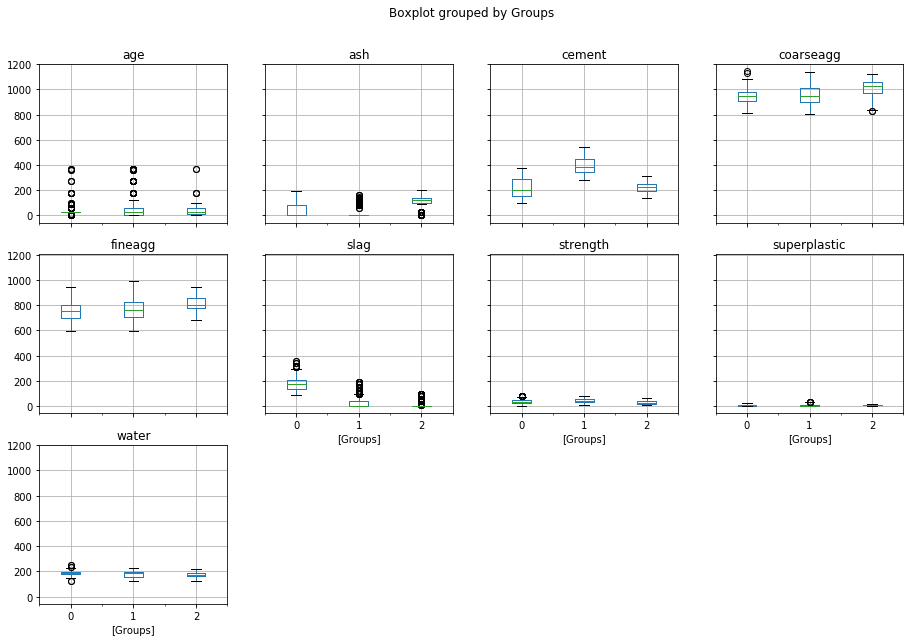

In [30]:
#Groups seems to almost evenly distributed, drawing a boxplot to check the distribution of each groups
concrete_df.boxplot(by='Groups',layout=(3,4),figsize=(15,10))

In [33]:
#Boxplot analysis suggest the presence of outliers, treating them as points more than 2*standard Deviation
def replace(group):
    median,std = group.median(),group.std()
    outliers = (group-median).abs()>2*std #defining outliers as any value more than 2*standard deviation
    group[outliers] = group.median()
    return group
correct_data = (concrete_df.groupby('Groups').transform(replace))
Concat_data = correct_data.join(pd.DataFrame(concrete_df['Groups']))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\U

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4784A1D68>,
      dtype=object)

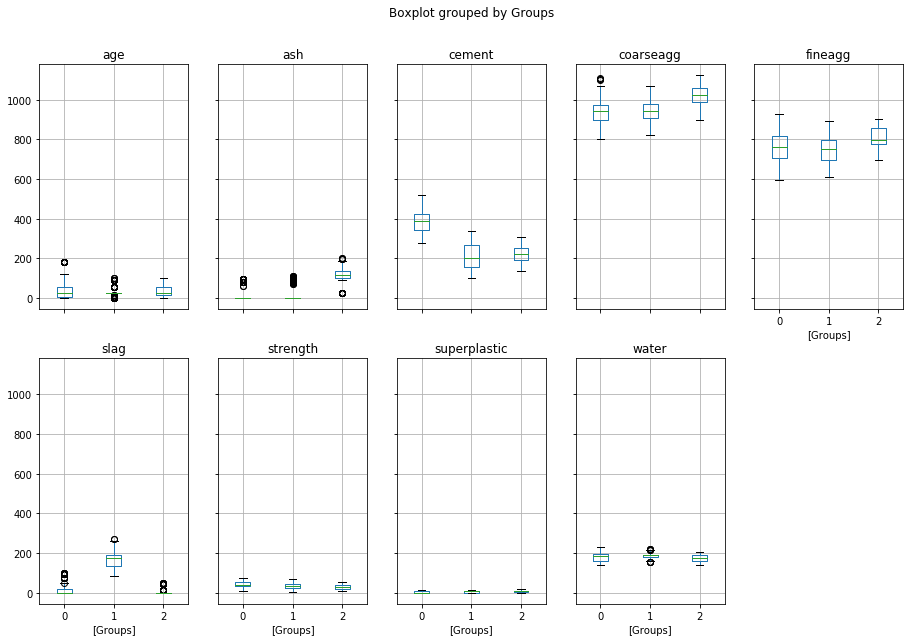

In [31]:
Concat_data.boxplot(by='Groups',layout=(2,5),figsize=(15,10))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


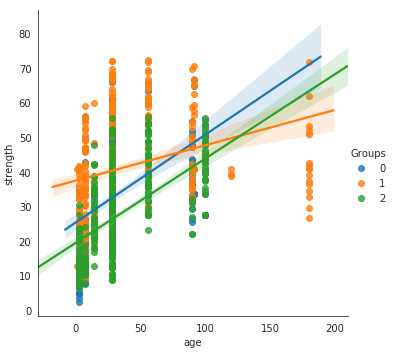

In [34]:
# new outliers are created as after treatment of outliers, the distribution became symetric and hence the varience reduced
# we will let it be as it is for now
var = 'age'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


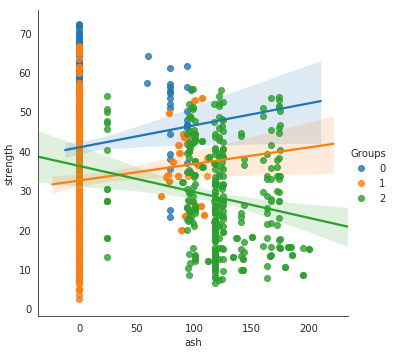

In [33]:
#Age is not a very strong predictor for group 2, checking for ash
var = 'ash'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


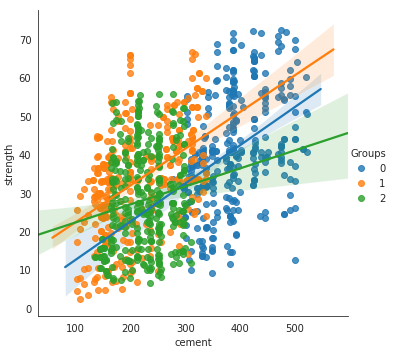

In [34]:
#plot suggest ash is not a very strong predictor as all the groups are almost parallel to X-axis
#Checking for cemenmt
var = 'cement'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


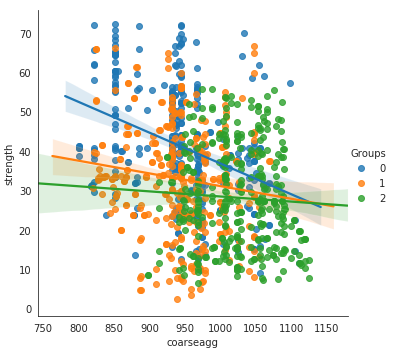

In [35]:
#Cement is a strong predictor for all three groups, checking for 'coarseagg'
var = 'coarseagg'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


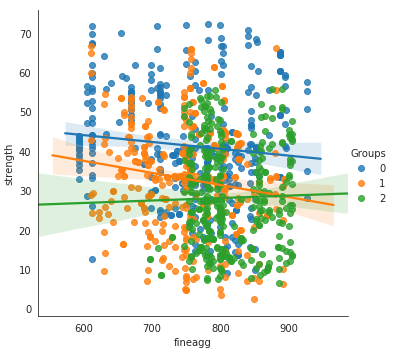

In [36]:
#Coarseagg is a good predictor for group 2 but not for the other 2 groups, now checking for 'fineagg'
var = 'fineagg'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


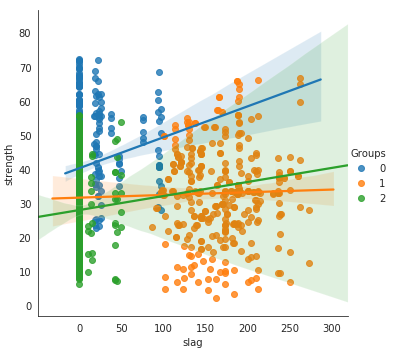

In [37]:
#fineagg is a poor predictor of concrete strength for all tree groups, checking for slag
var = 'slag'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


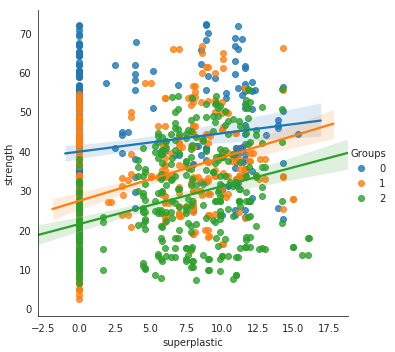

In [38]:
#slag seems to be a good predictor for group 2 but not of other 2 groups (0 & 1), checking for 'superplastic'
var = 'superplastic'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


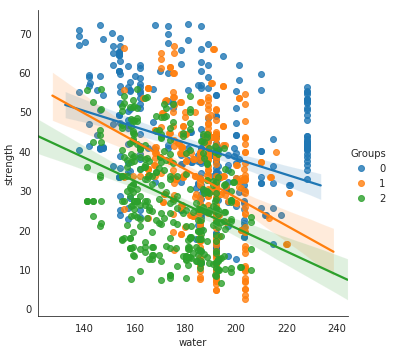

In [39]:
#Superplastic is a good predictor of group 0 & 1 but not a strong predictor for group 2, checking for water
var = 'water'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'strength',data=Concat_data,hue='Groups')

In [35]:
#Water is strong predictor for all the 3 groups
#Now we break the dataset in 3 different dataset on basis of groups
group1_df = Concat_data[Concat_data['Groups']==0]
group2_df = Concat_data[Concat_data['Groups']==1]
group3_df = Concat_data[Concat_data['Groups']==2]

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

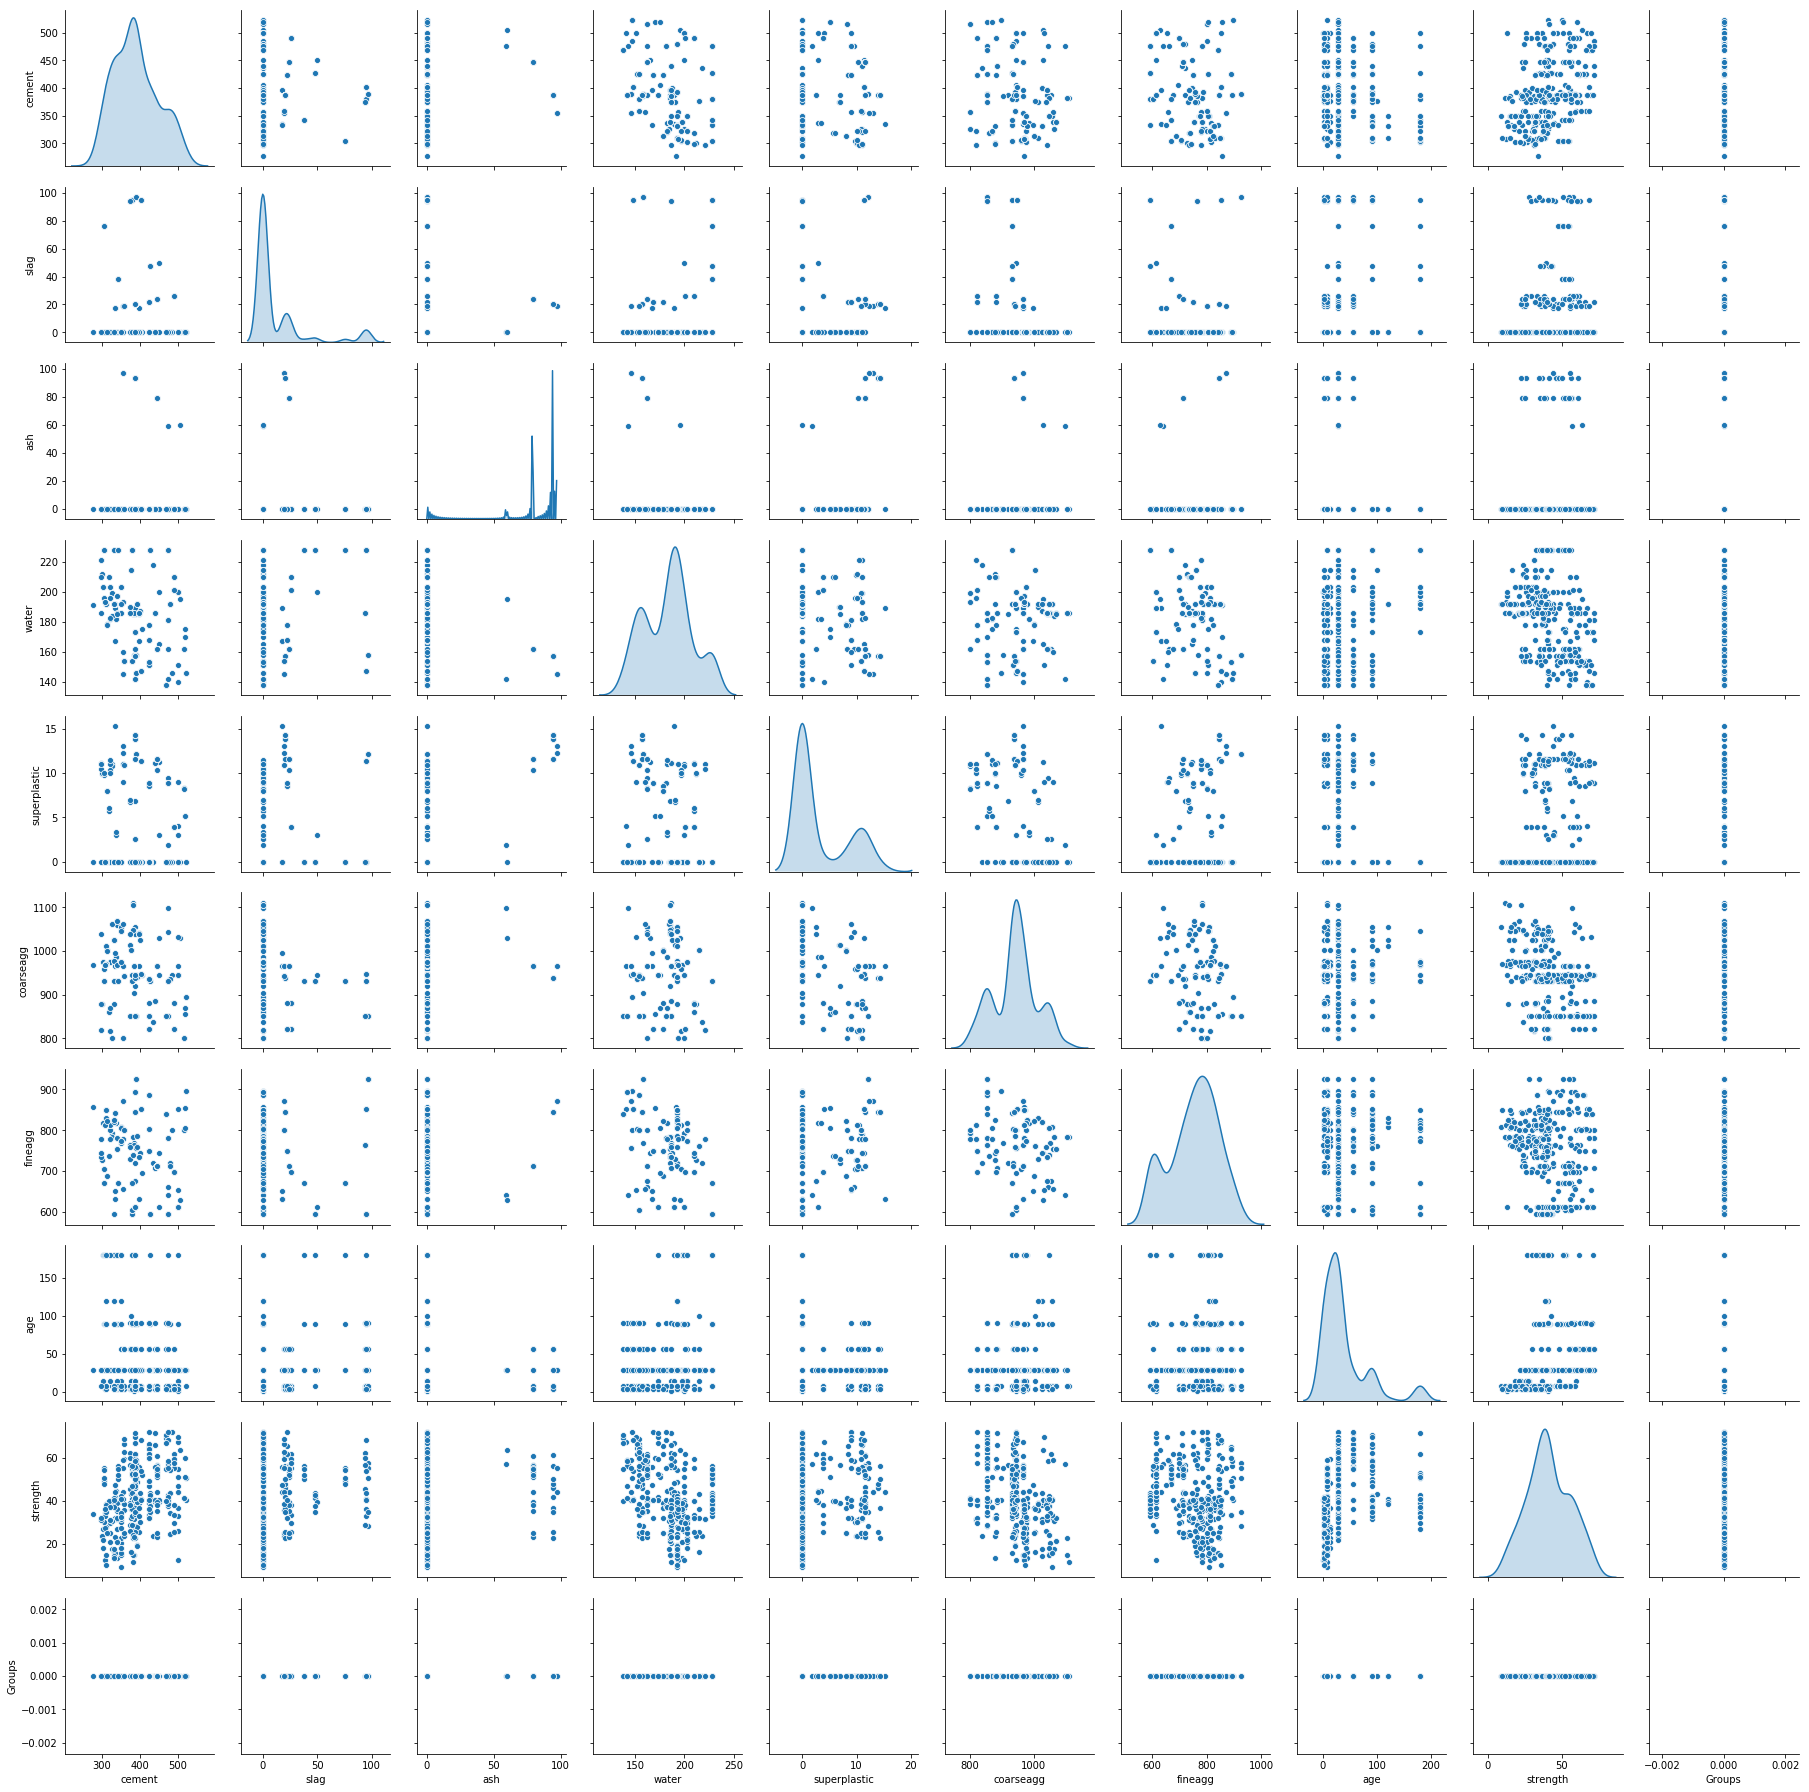

In [41]:
#Building models separately for each group using linear regression
#Modelling for Group1
sns.pairplot(group1_df,diag_kind='kde')

In [36]:
#Dropping ash from analysis, as it is a weak predictor as shown in bi-variate analysis
group1_df.drop('ash',axis=1,inplace=True)
group1_df.head()

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


cement   slag  water  superplastic  coarseagg  fineagg  age  strength  \
0   141.3  212.0  203.5           0.0      971.8    748.5   28     29.89   
3   266.0  114.0  189.0           0.0      932.0    670.0   28     45.85   
4   154.8  183.4  193.3           9.1     1047.4    696.7   28     18.29   
6   166.8  250.2  203.5           0.0      975.6    692.6    7     15.75   
9   155.0  184.0  194.0           9.0      880.0    699.0   28     28.99   

   Groups  
0       0  
3       0  
4       0  
6       0  
9       0

In [43]:
#scaling the data set using z-score
x_z1 = X.apply(zscore)

In [44]:
#Separating predictor and response variable
X1 = group1_df.loc[:,'cement':'age']
y1 = group1_df.loc[:,'strength']

In [48]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_z1,y,test_size = 0.2,random_state = 1)

In [49]:
#Using regularized Decision tree Regressor
reg = DecisionTreeRegressor(random_state=0,max_depth=7)

In [50]:
reg.fit(x_train1,y_train1)
y_pred = reg.predict(x_test1)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


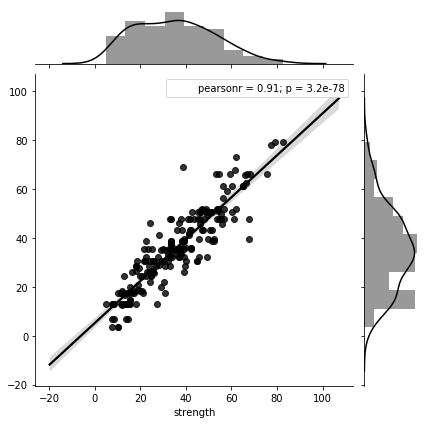

In [52]:
j=sns.jointplot(x = y_test1,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

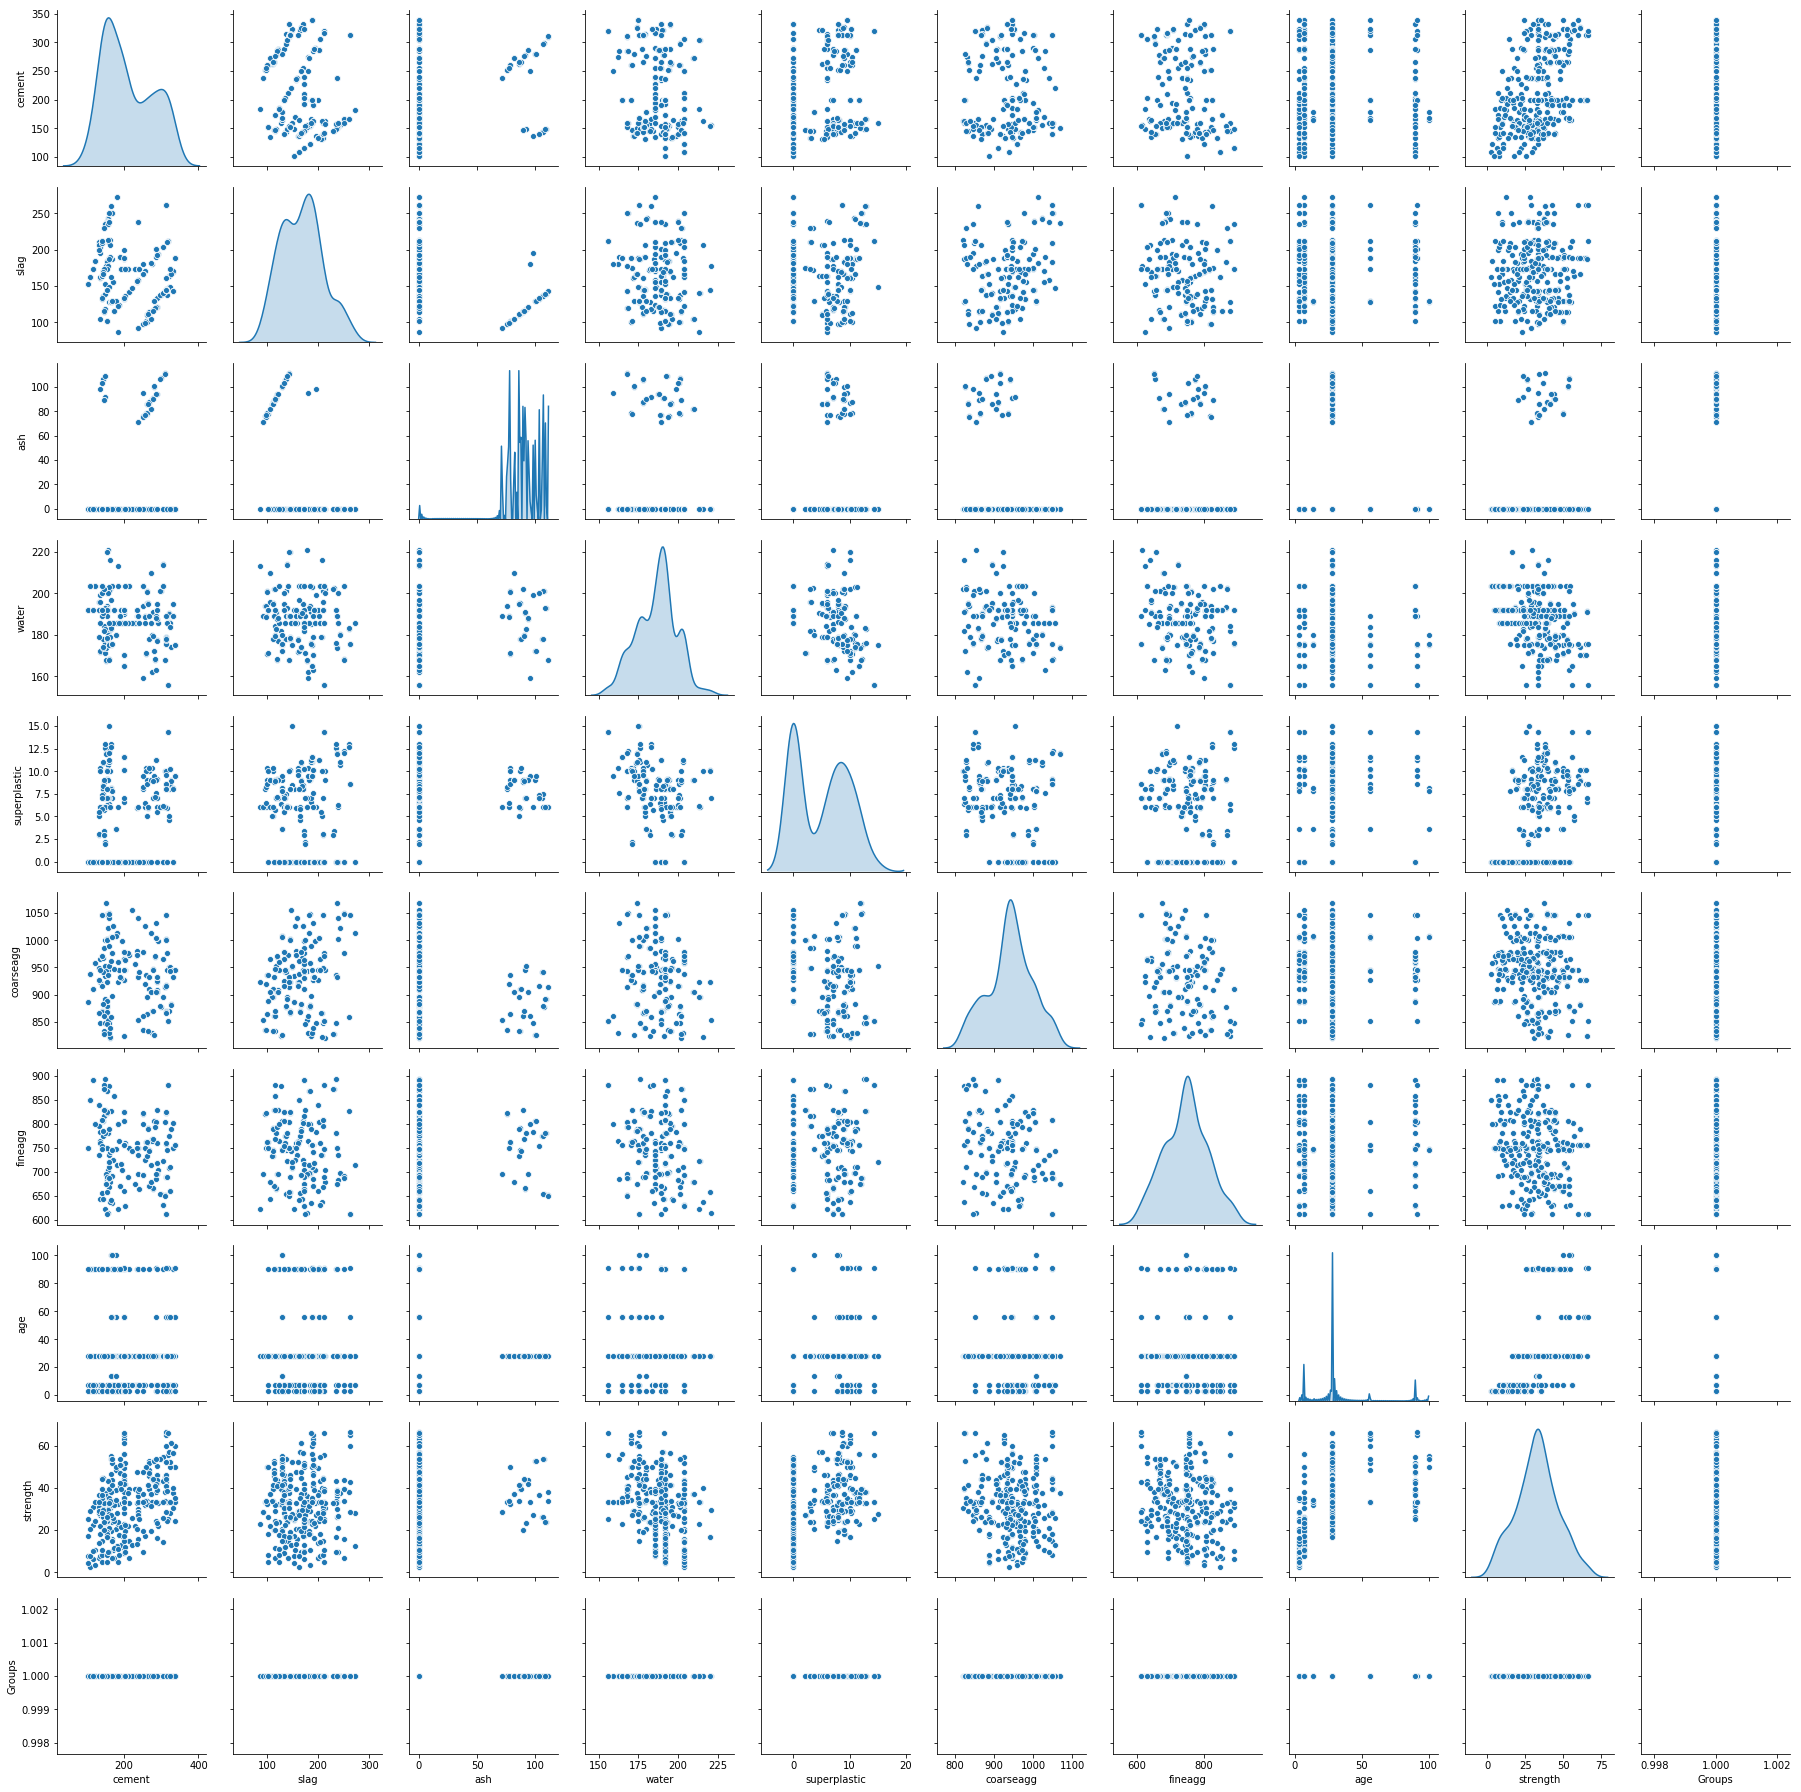

In [53]:
#Performance is 91% for group 1, testong the same for group 2
sns.pairplot(group2_df,diag_kind='kde')

In [54]:
group2_df.drop('ash',axis=1,inplace=True)
group2_df.head()

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


cement   slag  water  superplastic  coarseagg  fineagg  age  strength  \
0   141.3  212.0  203.5           0.0      971.8    748.5   28     29.89   
3   266.0  114.0  189.0           0.0      932.0    670.0   28     45.85   
4   154.8  183.4  193.3           9.1     1047.4    696.7   28     18.29   
6   166.8  250.2  203.5           0.0      975.6    692.6    7     15.75   
9   155.0  184.0  194.0           9.0      880.0    699.0   28     28.99   

   Groups  
0       1  
3       1  
4       1  
6       1  
9       1

In [55]:
#Separating predictor and response variable
X2 = group2_df.loc[:,'cement':'age']
y2 = group2_df.loc[:,'strength']

In [56]:
print(X2.shape)
print(y2.shape)

(350, 7)
(350,)


In [57]:
#scaling the data set using z-score
x_z2 = X2.apply(zscore)

In [61]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_z2,y2,test_size = 0.2,random_state = 1)

In [74]:
#Using regularized Decision tree Regressor
reg = DecisionTreeRegressor(random_state=0,max_depth=7)

In [75]:
reg.fit(x_train2,y_train2)
y_pred = reg.predict(x_test2)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


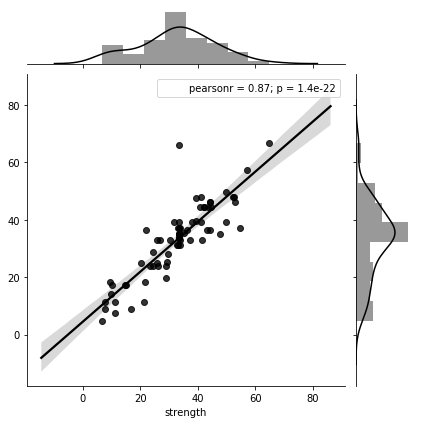

In [76]:
j=sns.jointplot(x = y_test2,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)

In [77]:
#Model strength has increased to 87%

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

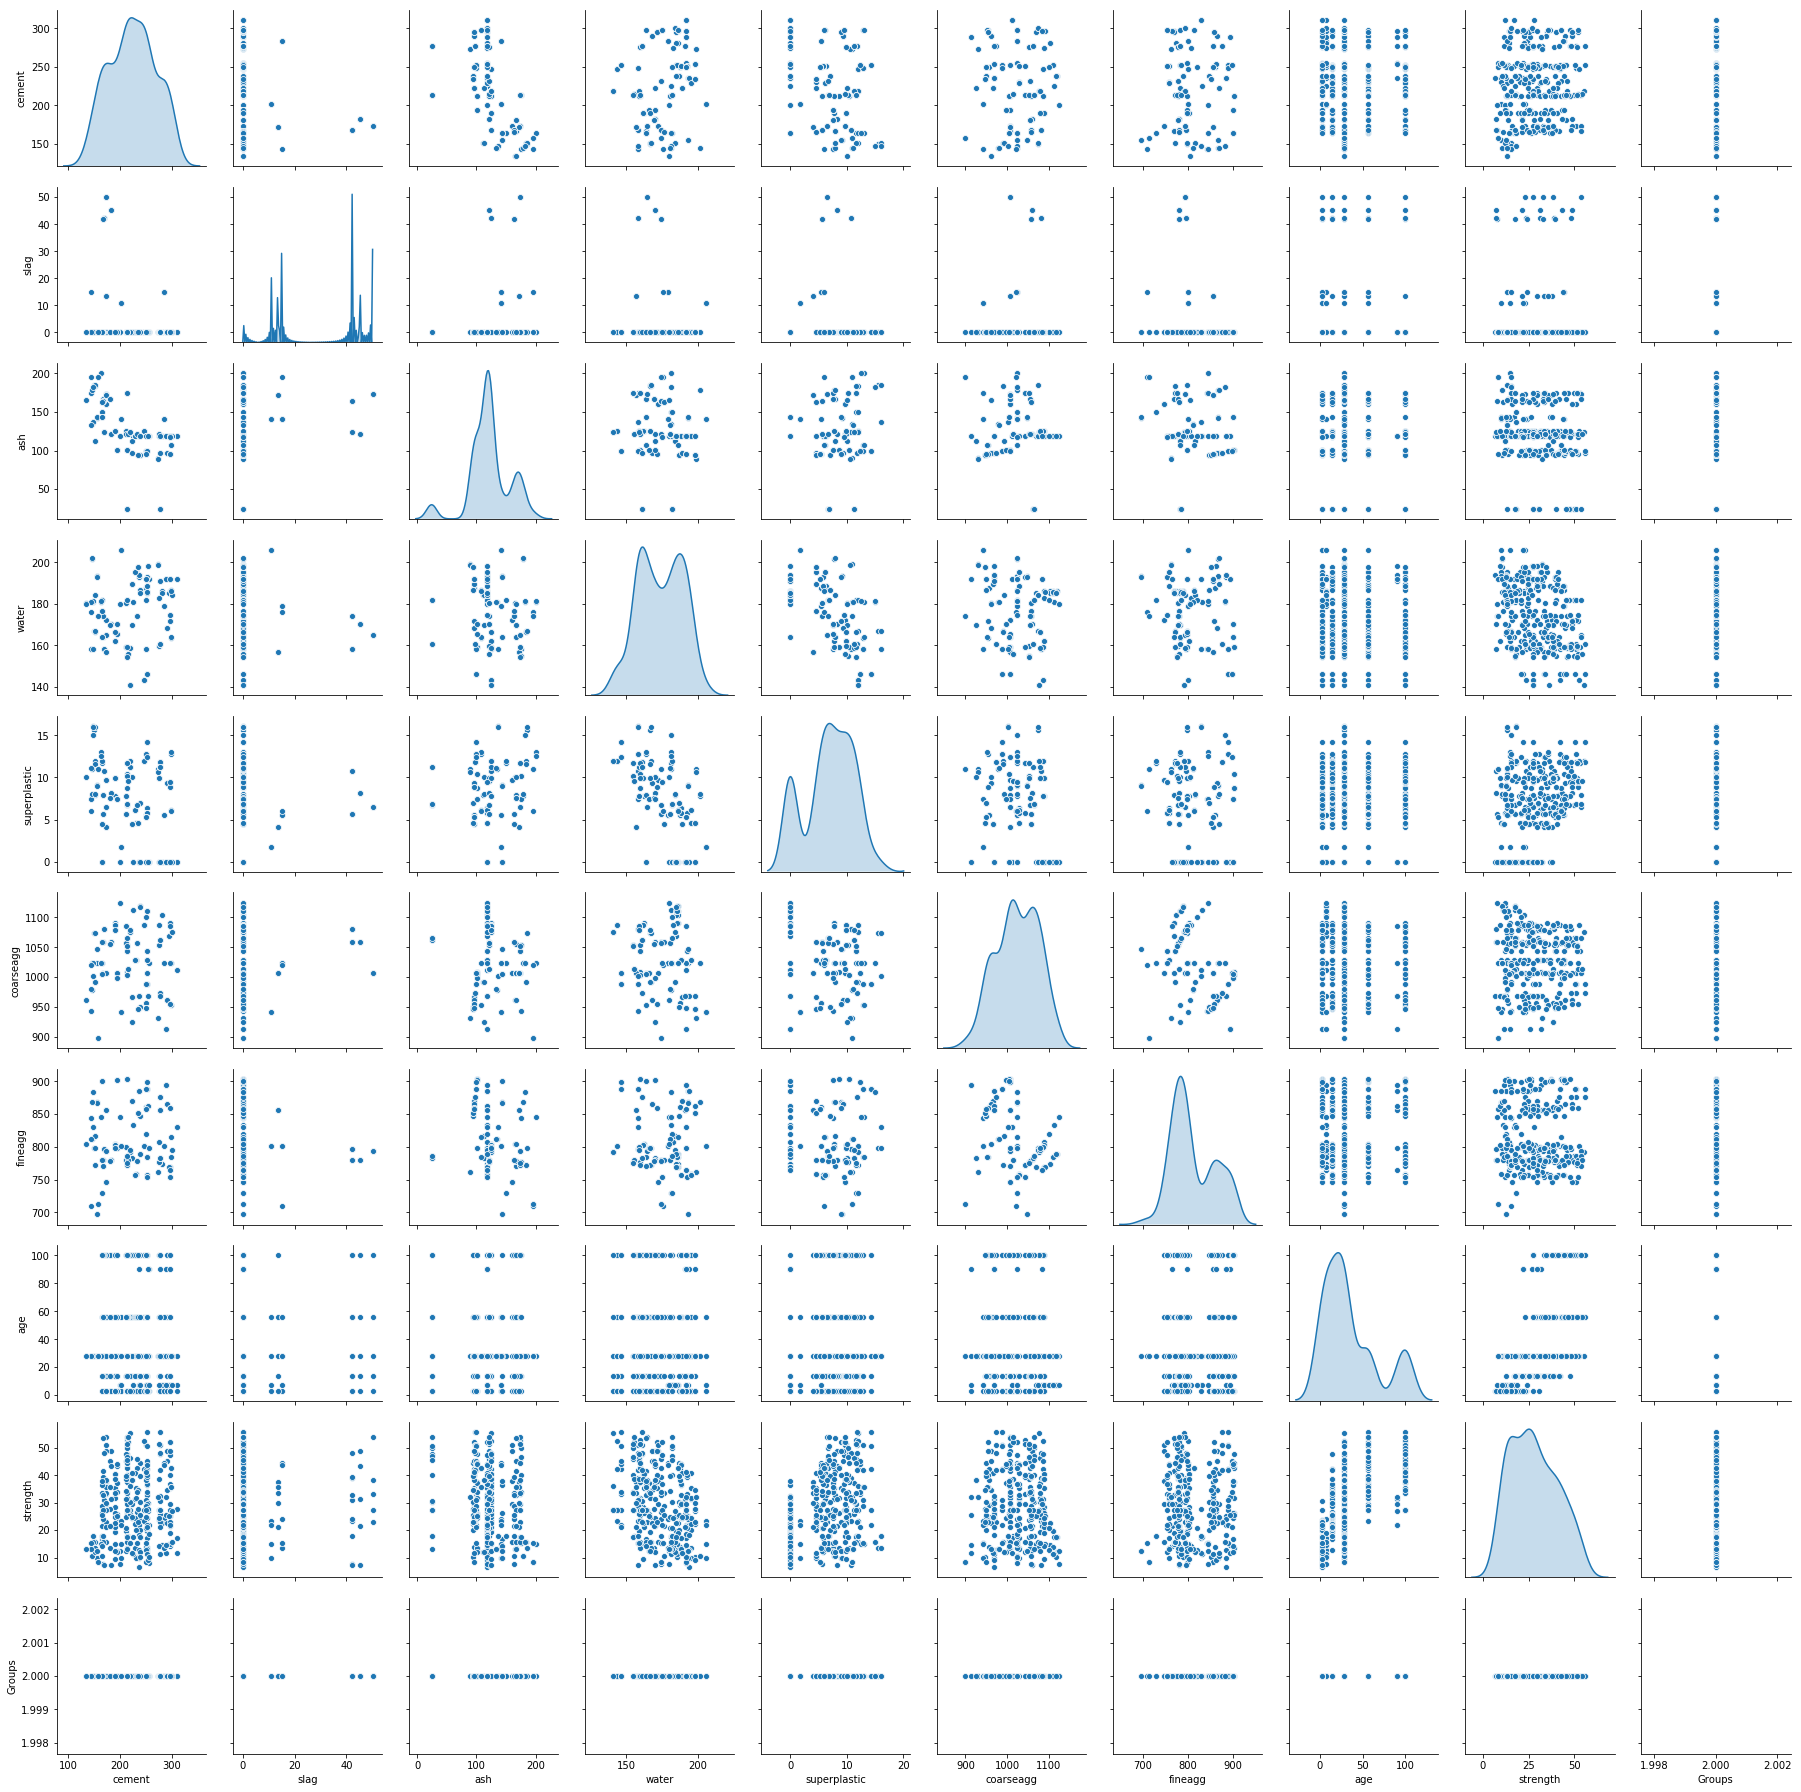

In [78]:
#building model for Group 3
sns.pairplot(group3_df,diag_kind='kde')

In [79]:
group3_df.drop('ash',axis=1,inplace=True)
group3_df.head()

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


cement  slag  water  superplastic  coarseagg  fineagg  age  strength  \
1   168.9  42.2  158.3          10.8     1080.8    796.2   14     23.51   
2   250.0   0.0  187.4           5.5      956.9    861.2   28     29.22   
5   255.0   0.0  192.0           0.0     1022.8    798.9   90     21.86   
7   251.4   0.0  188.5           6.4     1028.4    757.7   56     36.64   
8   296.0   0.0  192.0           0.0     1085.0    765.0   28     21.65   

   Groups  
1       2  
2       2  
5       2  
7       2  
8       2

In [84]:
#Separating predictor and response variable
X4 = group3_df.loc[:,'cement':'age']
y4 = group3_df.loc[:,'strength']

In [85]:
print(X4.shape)
print(y4.shape)

(345, 7)
(345,)


In [88]:
#scaling the data set using z-score
x_z4 = X4.apply(zscore)

In [89]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_z4,y4,test_size = 0.2,random_state = 1)

In [93]:
#Using regularized Decision tree Regressor
reg = DecisionTreeRegressor(random_state=0,max_depth=5)

In [94]:
reg.fit(x_train3,y_train3)
y_pred = reg.predict(x_test3)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


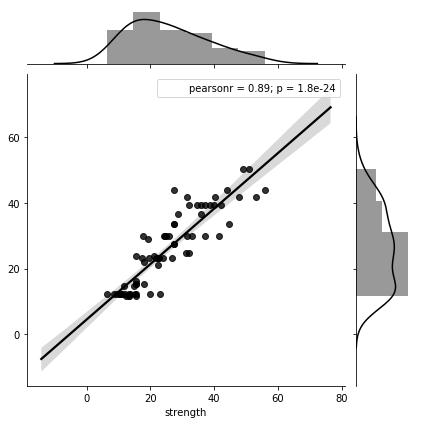

In [95]:
j=sns.jointplot(x = y_test3,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)

In [96]:
#Model strength for group 3 has increased to 89%

Conclusion:
1. We achieved the group level accuracy between 85% to 91%, hence we can say that the model will perform with an accuracy
   of 85% to 95% with a confidence level of 95%
2. Performance of model could have increased further with the use of Lasso regressor; however we have received the desired performance; hence leaving the model here

Thank you

In [39]:
#Moving ahead & trying to further improve the model strength using PCA, Regularizing technique Ridge & Lasso
conc_new = concrete_df.copy(deep=True) #Creating a copy of dataset 

In [40]:
conc_new.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  Groups  
0     29.89       0  
1     23.51       2  
2     29.22       2  
3     45.85       0  
4     18.29       0

In [47]:
conc_new.isna().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
Groups          False
dtype: bool

In [48]:
conc_new.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   
Groups        1030.0    0.995146    0.821821    0.00    0.000    1.000   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6  
Groups           2.000     2.0

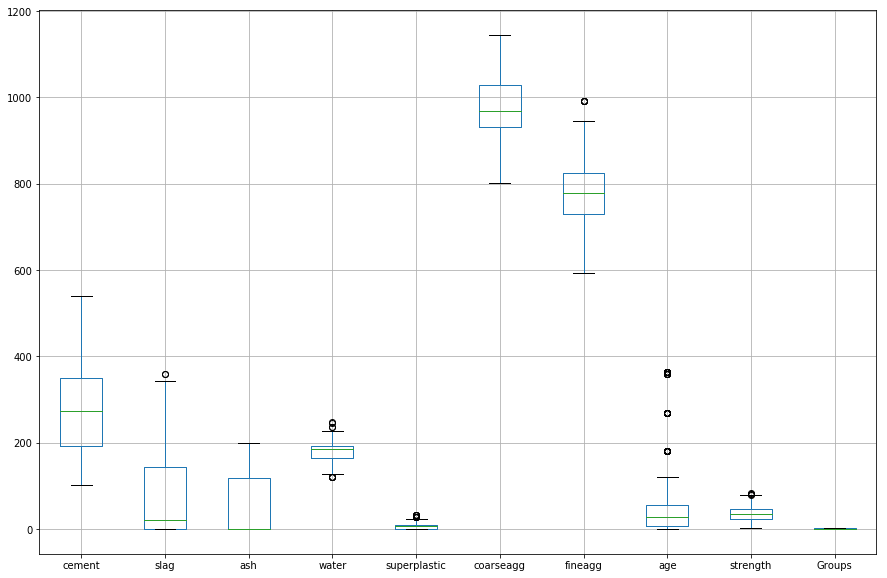

In [51]:
conc_new.boxplot(figsize=(15,10))